In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
#training_data = np.load('C://Users//krist//Desktop//ITU//3_semester//machine_learning//MLProject2024//MLProject2024//fashion_train.npy')
training_data = np.load(f'../fashion_train.npy')

In [116]:
image = [i for i in training_data[:,:-1]]
label = [i for i in training_data[:,-1]]

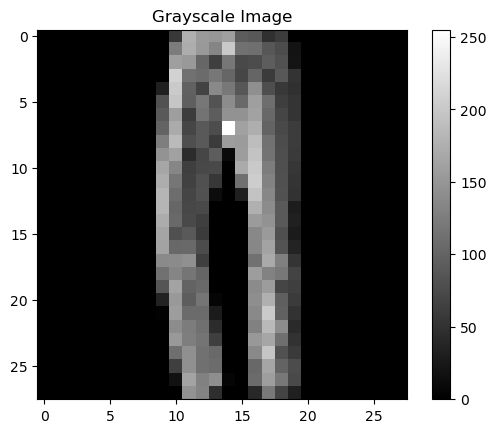

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape the data assuming it's a 28x28 image
image_data = training_data[1][:-1].reshape(28, 28)

# Plotting the grayscale image
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.title("Grayscale Image")
plt.show()



In [118]:
imagesums=[]
from scipy.ndimage import convolve
for i in range(len(image)):
        #print(image[i])
        image_2d = image[i].reshape((28, 28))
        kernel = np.array([[1, -1]])
        edges = np.abs(convolve(image_2d, kernel)) + np.abs(convolve(image_2d, kernel.T))
        circumference = np.sum(edges > 0)
        imagesums.append([np.sum(image[i]),circumference])


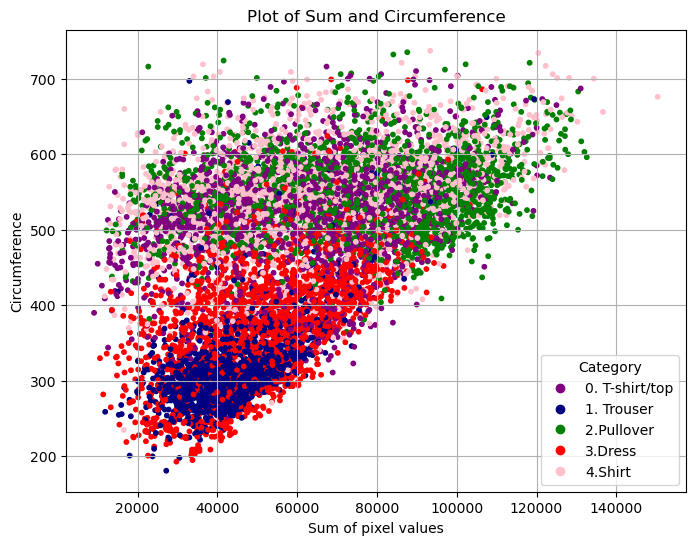

In [119]:
# Step 1: Extract x and y coordinates
x_coords = [point[0] for point in imagesums]
y_coords = [point[1] for point in imagesums]
from matplotlib.colors import ListedColormap


plt.figure(figsize=(8, 6))
colors = ["purple", "navy", "green", "red", "pink"]
cmap = ListedColormap(colors)
scatter = plt.scatter(x_coords, y_coords, c=label, cmap=cmap, s=10, label='Points')
labesnames=["0. T-shirt/top", "1. Trouser","2.Pullover","3.Dress","4.Shirt"]


plt.legend(handles=scatter.legend_elements()[0], labels=labesnames, title="Category")
plt.title("Plot of Sum and Circumference")
plt.xlabel("Sum of pixel values")
plt.ylabel("Circumference")
plt.grid(True)
plt.show()

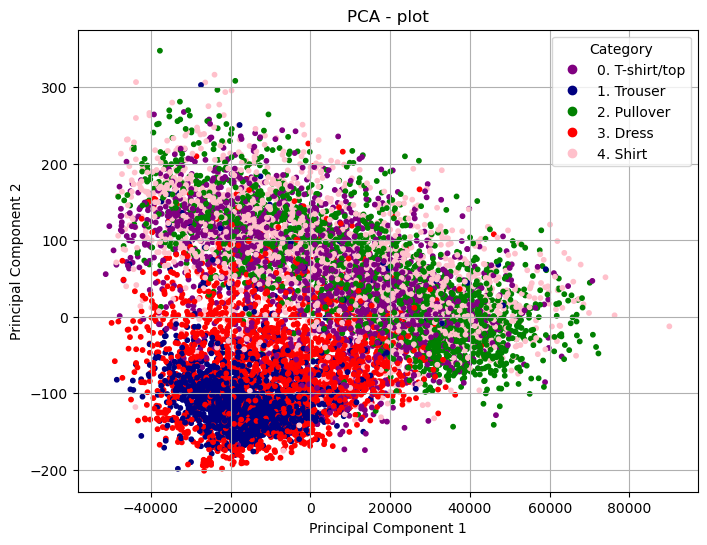

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

x_coords = [p[0] for p in imagesums]
y_coords = [p[1] for p in imagesums]

# Combine x and y coordinates into a single dataset for PCA
data = np.array([x_coords, y_coords]).T
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
colors = ["purple", "navy", "green", "red", "pink"]
cmap = ListedColormap(colors)
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=label, cmap=cmap, s=10, label='Points')
labelnames = ["0. T-shirt/top", "1. Trouser", "2. Pullover", "3. Dress", "4. Shirt"]


plt.legend(handles=scatter.legend_elements()[0], labels=labelnames, title="Category")
plt.title("PCA - plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [121]:
for i in range(len(image)):
    for k in range(len(image[i])):
        if image[i][k] != 0:
            image[i][k] = image[i][k] / 255

KeyboardInterrupt: 

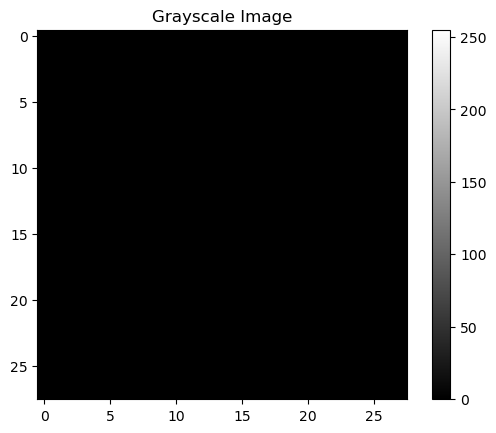

In [8]:
# Reshape the data assuming it's a 28x28 image
image_data = image[5][:-1].reshape(28, 28)

# Plotting the grayscale image
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.title("Grayscale Image")
plt.show()


[  0   0   0   0   0   3   0   0   0  41  92 172 100  23  22  33 104 136
  93  44   0   0   0   2   0   0   0   0   0   0   0   0   2   0   6 119
 166 177 159 153 227 232 215 240 227 156 162 180 175 102   0   0   0   0
   0   0   0   0   0   2   0  16 166 143 133 126 134 121 102 146 171 160
 106 113 130 130 136 151 159   0   0   1   0   0   0   0   0   1   0 105
 139 123 130 129 133 133 134 116 108 113 129 135 136 131 128 126 150  77
   0   2   0   0   0   0   0   0   2 151 128 126 129 130 131 130 129 131
 135 134 130 130 131 130 130 130 139 138   0   0   0   0   0   0   0   0
  44 148 129 126 130 133 129 129 130 130 129 129 130 129 131 130 131 125
 146 165   2   0   0   0   0   0   0   0  93 156 148 124 126 126 128 128
 129 129 129 129 129 128 131 125 145 141 153 156  36   0   0   0   0   0
   0   0 134 150 169 136 123 130 129 129 133 133 130 131 130 134 135 120
 157 143 156 157  78   0   0   0   0   0   0   0 155 140 176 174 103 138
 130 131 130 130 134 131 131 130 148 113 179 181 15

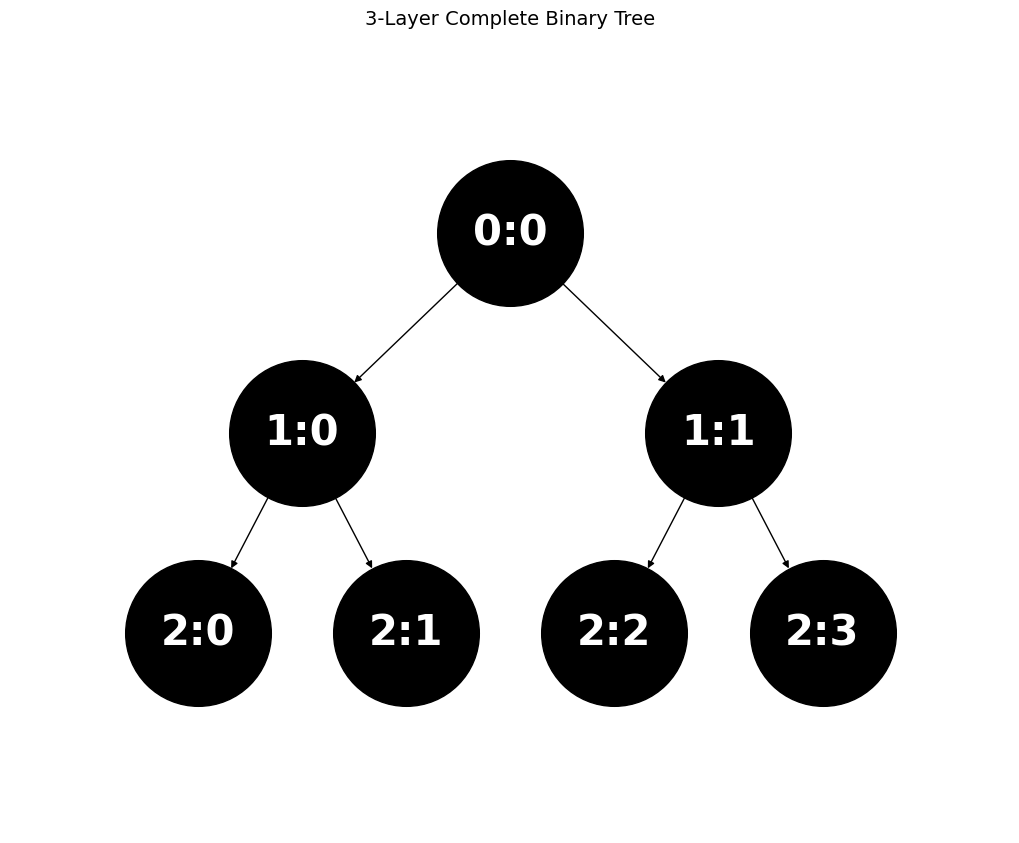

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_binary_tree():
    # Create a directed graph
    tree = nx.DiGraph()

    # Define the edges of the binary tree with updated node names
    edges = [
        ("0:0", "1:0"), ("0:0", "1:1"),
        ("1:0", "2:0"), ("1:0", "2:1"),
        ("1:1", "2:2"), ("1:1", "2:3")
    ]

    # Add edges to the graph
    tree.add_edges_from(edges)

    # Create a more compact layout for the nodes
    pos = {
        "0:0": (0, 0),
        "1:0": (-0.5, -1), "1:1": (0.5, -1),
        "2:0": (-0.75, -2), "2:1": (-0.25, -2),
        "2:2": (0.25, -2), "2:3": (0.75, -2)
    }

    # Adjust figure size and padding to prevent clipping
    plt.figure(figsize=(10, 8))  # Increase figure size for more space
    nx.draw(tree, pos, with_labels=True, node_size=11000, node_color="black", font_color="white", font_size=30, font_weight="bold", arrows=True)

    # Set the limits to ensure space around the nodes and prevent clipping
    plt.xlim(-1.2, 1.2)
    plt.ylim(-3, 1)

    # Display the plot
    plt.title("3-Layer Complete Binary Tree", fontsize=14)
    plt.show()

# Call the function to draw the binary tree
draw_binary_tree()
